## Capstone Project: The Battle of the Neighborhoods (San Jose vs Austin)

By: Howard Chang
    June 6, 2021

### 1. Import Libraries 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import json # to handle JSON files

from bs4 import BeautifulSoup # web scraping

import os

from sklearn.cluster import KMeans # clustering

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import matplotlib.cm as cm
import matplotlib.colors as colors
import re

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         

### 2. Obtain Data Set
### webscrape for list of neighborhoods using beautifulsoup

In [3]:
source = requests.get('https://www.sanjose.org/neighborhoods').text

soup = BeautifulSoup(source, 'lxml')

#body = soup.find('body')
#print(body.prettify()) # run to check that the website has loaded 

SJ_list=[]  # create a list
for Districts in soup.find_all('div', class_='hero--event'):
    Name = Districts.h2.a.text
    SJ_list.append(Name)

SJ_list

['Downtown',
 'Japantown',
 'Little Italy',
 'Little Portugal',
 'Little Saigon',
 'Mayfair',
 'Santana Row',
 'West San Jose',
 'Willow Glen',
 'The Alameda',
 'Rose Garden',
 'Naglee Park',
 'Alviso',
 'North San Jose',
 'Alum Rock',
 'Evergreen',
 'Almaden Valley',
 'South San Jose']

#### convert list to dataframe and add necessary columns

In [4]:
df = pd.DataFrame(SJ_list, columns=["Neighborhood"])

print(df)

       Neighborhood
0          Downtown
1         Japantown
2      Little Italy
3   Little Portugal
4     Little Saigon
5           Mayfair
6       Santana Row
7     West San Jose
8       Willow Glen
9       The Alameda
10      Rose Garden
11      Naglee Park
12           Alviso
13   North San Jose
14        Alum Rock
15        Evergreen
16   Almaden Valley
17   South San Jose


In [5]:
df["SJ_address"] = " San Jose, CA, US"

print(df)

       Neighborhood         SJ_address
0          Downtown   San Jose, CA, US
1         Japantown   San Jose, CA, US
2      Little Italy   San Jose, CA, US
3   Little Portugal   San Jose, CA, US
4     Little Saigon   San Jose, CA, US
5           Mayfair   San Jose, CA, US
6       Santana Row   San Jose, CA, US
7     West San Jose   San Jose, CA, US
8       Willow Glen   San Jose, CA, US
9       The Alameda   San Jose, CA, US
10      Rose Garden   San Jose, CA, US
11      Naglee Park   San Jose, CA, US
12           Alviso   San Jose, CA, US
13   North San Jose   San Jose, CA, US
14        Alum Rock   San Jose, CA, US
15        Evergreen   San Jose, CA, US
16   Almaden Valley   San Jose, CA, US
17   South San Jose   San Jose, CA, US


In [6]:
df["query"] = df["Neighborhood"].str.cat(df["SJ_address"], sep="")

print(df)

       Neighborhood         SJ_address                             query
0          Downtown   San Jose, CA, US         Downtown San Jose, CA, US
1         Japantown   San Jose, CA, US        Japantown San Jose, CA, US
2      Little Italy   San Jose, CA, US     Little Italy San Jose, CA, US
3   Little Portugal   San Jose, CA, US  Little Portugal San Jose, CA, US
4     Little Saigon   San Jose, CA, US    Little Saigon San Jose, CA, US
5           Mayfair   San Jose, CA, US          Mayfair San Jose, CA, US
6       Santana Row   San Jose, CA, US      Santana Row San Jose, CA, US
7     West San Jose   San Jose, CA, US    West San Jose San Jose, CA, US
8       Willow Glen   San Jose, CA, US      Willow Glen San Jose, CA, US
9       The Alameda   San Jose, CA, US      The Alameda San Jose, CA, US
10      Rose Garden   San Jose, CA, US      Rose Garden San Jose, CA, US
11      Naglee Park   San Jose, CA, US      Naglee Park San Jose, CA, US
12           Alviso   San Jose, CA, US           Al

#### run names of neighborhoods through geopy to obtain geospatial coordinates

In [7]:
geolocator = Nominatim(user_agent="myApp")

for i in df.index:
    try:
        #tries fetch address from geopy
        location = geolocator.geocode(df['query'][i])
        
        #append lat/long to column using dataframe location
        df.loc[i,'location_lat'] = location.latitude
        df.loc[i,'location_long'] = location.longitude
        df.loc[i,'location_address'] = location.address
    except:
        #catches exception for the case where no value is returned
        #appends null value to column
        df.loc[i,'location_lat'] = ""
        df.loc[i,'location_long'] = ""
        df.loc[i,'location_address'] = ""
        
print(df)       

       Neighborhood         SJ_address                             query  \
0          Downtown   San Jose, CA, US         Downtown San Jose, CA, US   
1         Japantown   San Jose, CA, US        Japantown San Jose, CA, US   
2      Little Italy   San Jose, CA, US     Little Italy San Jose, CA, US   
3   Little Portugal   San Jose, CA, US  Little Portugal San Jose, CA, US   
4     Little Saigon   San Jose, CA, US    Little Saigon San Jose, CA, US   
5           Mayfair   San Jose, CA, US          Mayfair San Jose, CA, US   
6       Santana Row   San Jose, CA, US      Santana Row San Jose, CA, US   
7     West San Jose   San Jose, CA, US    West San Jose San Jose, CA, US   
8       Willow Glen   San Jose, CA, US      Willow Glen San Jose, CA, US   
9       The Alameda   San Jose, CA, US      The Alameda San Jose, CA, US   
10      Rose Garden   San Jose, CA, US      Rose Garden San Jose, CA, US   
11      Naglee Park   San Jose, CA, US      Naglee Park San Jose, CA, US   
12          

#### make corrections to list - update incorrect data- using google maps

In [8]:
# input mising data and fix incorrect data

#the original coordinates were in LA??
df.iloc[5, df.columns.get_loc('location_lat')] = 37.351552  
df.iloc[5, df.columns.get_loc('location_long')] = -121.844602
df.iloc[5, df.columns.get_loc('location_address')] = "Mayfair, San Jose, California, 95116, United States "


df.iloc[7, df.columns.get_loc('location_lat')] = 37.304148
df.iloc[7, df.columns.get_loc('location_long')] = -122.005378
df.iloc[7, df.columns.get_loc('location_address')] = "West San Jose, San Jose, California, 95129, United States "

#cedar
df.iloc[9, df.columns.get_loc('location_lat')] = 37.341499
df.iloc[9, df.columns.get_loc('location_long')] = -121.924532
df.iloc[9, df.columns.get_loc('location_address')] = "The Alameda, San Jose, California, 95126, United States"

#north san jose incorrect
df.iloc[13, df.columns.get_loc('location_lat')] = 37.391203 
df.iloc[13, df.columns.get_loc('location_long')] = -121.929227
df.iloc[13, df.columns.get_loc('location_address')] = "North San Jose, San Jose, California, 95131, United States"


#fix incorrect data

#Little Italy correct coordinates
df.iloc[2, df.columns.get_loc('location_lat')] = 37.335851
df.iloc[2, df.columns.get_loc('location_long')] = -121.899385

#Little Saigon correct coordinates
df.iloc[4, df.columns.get_loc('location_lat')] = 37.331868
df.iloc[4, df.columns.get_loc('location_long')] = -121.855294

#Rose Garden correct coordinates
df.iloc[10, df.columns.get_loc('location_lat')] = 37.332501
df.iloc[10, df.columns.get_loc('location_long')] = -121.928829

#Evergreen correct coordinates
df.iloc[15, df.columns.get_loc('location_lat')] = 37.300084
df.iloc[15, df.columns.get_loc('location_long')] = -121.771703

#South San Jose correct coordinates
df.iloc[17, df.columns.get_loc('location_lat')] = 37.279698
df.iloc[17, df.columns.get_loc('location_long')] = -121.837337

#### obtain dataset for Austin Texas follow the same steps as for San Jose

#### beautifulsoup to obtain list of neighborhoods

In [9]:
url = 'https://www.homecity.com/blog/best-neighborhoods-in-austin/'
data = requests.get(url)
soup = BeautifulSoup(data.text, 'html.parser')
neighborhood = soup.find("div", class_='post-content')
neighborhood_names= neighborhood.find_all("h2")
print(neighborhood_names)


[<h2>1. Allandale</h2>, <h2>2. Barton Hills</h2>, <h2>3. Buda</h2>, <h2>4. Cedar Park</h2>, <h2>5. Cherrywood</h2>, <h2>6. Downtown</h2>, <h2>7. Dripping Springs</h2>, <h2>8. East Austin</h2>, <h2>9. Georgetown</h2>, <h2>10. Hyde Park</h2>, <h2>11. Kyle</h2>, <h2>13. Mueller</h2>, <h2>14. North Loop</h2>, <h2>15. North University</h2>, <h2>16. Old West Austin</h2>, <h2>17. South Austin</h2>, <h2>18. Tarrytown</h2>, <h2>19. Wells Branch</h2>, <h2>20. Westlake </h2>]


In [10]:
neighborhood_list = []
for n in neighborhood_names[0:]:
    result = n.text.strip()
    neighborhood_list.append(result)
    
print(neighborhood_list)

['1. Allandale', '2. Barton Hills', '3. Buda', '4. Cedar Park', '5. Cherrywood', '6. Downtown', '7. Dripping Springs', '8. East Austin', '9. Georgetown', '10. Hyde Park', '11. Kyle', '13. Mueller', '14. North Loop', '15. North University', '16. Old West Austin', '17. South Austin', '18. Tarrytown', '19. Wells Branch', '20. Westlake']


#### convert to dataframe 

In [11]:
from pandas import DataFrame
df2 = DataFrame(neighborhood_list, columns=["Neighborhood"])

df2['Neighborhood'] = df2['Neighborhood'].map(lambda x: str(x)[3:]) #remove the first 3 characters
print(df2)


         Neighborhood
0           Allandale
1        Barton Hills
2                Buda
3          Cedar Park
4          Cherrywood
5            Downtown
6    Dripping Springs
7         East Austin
8          Georgetown
9           Hyde Park
10               Kyle
11            Mueller
12         North Loop
13   North University
14    Old West Austin
15       South Austin
16          Tarrytown
17       Wells Branch
18           Westlake


In [12]:
df2["ATX_address"] = " Austin, TX, US"
df2["query"] = df2["Neighborhood"].str.cat(df2["ATX_address"], sep="")
print(df2)

         Neighborhood      ATX_address                             query
0           Allandale   Austin, TX, US          Allandale Austin, TX, US
1        Barton Hills   Austin, TX, US       Barton Hills Austin, TX, US
2                Buda   Austin, TX, US               Buda Austin, TX, US
3          Cedar Park   Austin, TX, US         Cedar Park Austin, TX, US
4          Cherrywood   Austin, TX, US         Cherrywood Austin, TX, US
5            Downtown   Austin, TX, US           Downtown Austin, TX, US
6    Dripping Springs   Austin, TX, US   Dripping Springs Austin, TX, US
7         East Austin   Austin, TX, US        East Austin Austin, TX, US
8          Georgetown   Austin, TX, US         Georgetown Austin, TX, US
9           Hyde Park   Austin, TX, US          Hyde Park Austin, TX, US
10               Kyle   Austin, TX, US               Kyle Austin, TX, US
11            Mueller   Austin, TX, US            Mueller Austin, TX, US
12         North Loop   Austin, TX, US         Nort

In [13]:
df2['location_lat'] = ""
df2['location_long'] = ""
df2['location_address'] = ""

#### run through geopy to obtain geospatial coordinates

In [14]:
geolocator = Nominatim(user_agent="myApp")

for i in df2.index:
    try:
        #tries fetch address from geopy
        location = geolocator.geocode(df2['query'][i])
        
        #append lat/long to column using dataframe location
        df2.loc[i,'location_lat'] = location.latitude
        df2.loc[i,'location_long'] = location.longitude
        df2.loc[i,'location_address'] = location.address
    except:
        #catches exception for the case where no value is returned
        #appends null value to column
        df2.loc[i,'location_lat'] = ""
        df2.loc[i,'location_long'] = ""
        df2.loc[i,'location_address'] = ""
        
print(df2)      

         Neighborhood      ATX_address                             query  \
0           Allandale   Austin, TX, US          Allandale Austin, TX, US   
1        Barton Hills   Austin, TX, US       Barton Hills Austin, TX, US   
2                Buda   Austin, TX, US               Buda Austin, TX, US   
3          Cedar Park   Austin, TX, US         Cedar Park Austin, TX, US   
4          Cherrywood   Austin, TX, US         Cherrywood Austin, TX, US   
5            Downtown   Austin, TX, US           Downtown Austin, TX, US   
6    Dripping Springs   Austin, TX, US   Dripping Springs Austin, TX, US   
7         East Austin   Austin, TX, US        East Austin Austin, TX, US   
8          Georgetown   Austin, TX, US         Georgetown Austin, TX, US   
9           Hyde Park   Austin, TX, US          Hyde Park Austin, TX, US   
10               Kyle   Austin, TX, US               Kyle Austin, TX, US   
11            Mueller   Austin, TX, US            Mueller Austin, TX, US   
12         N

#### make corrections to list - update incorrect data- using google maps

In [15]:
df2.iloc[13, df.columns.get_loc('location_lat')] = 30.296596
df2.iloc[13, df.columns.get_loc('location_long')] = -97.738173
df2.iloc[13, df.columns.get_loc('location_address')] = "North University Austin, Travis County, Texas, 78731, United States"

#cedar
df2.iloc[3, df.columns.get_loc('location_lat')] = 30.520500
df2.iloc[3, df.columns.get_loc('location_long')] = -97.836826
df2.iloc[13, df.columns.get_loc('location_address')] = "Cedar Park, Travis County, Texas, 78731, United States"
print(df2)

         Neighborhood      ATX_address                             query  \
0           Allandale   Austin, TX, US          Allandale Austin, TX, US   
1        Barton Hills   Austin, TX, US       Barton Hills Austin, TX, US   
2                Buda   Austin, TX, US               Buda Austin, TX, US   
3          Cedar Park   Austin, TX, US         Cedar Park Austin, TX, US   
4          Cherrywood   Austin, TX, US         Cherrywood Austin, TX, US   
5            Downtown   Austin, TX, US           Downtown Austin, TX, US   
6    Dripping Springs   Austin, TX, US   Dripping Springs Austin, TX, US   
7         East Austin   Austin, TX, US        East Austin Austin, TX, US   
8          Georgetown   Austin, TX, US         Georgetown Austin, TX, US   
9           Hyde Park   Austin, TX, US          Hyde Park Austin, TX, US   
10               Kyle   Austin, TX, US               Kyle Austin, TX, US   
11            Mueller   Austin, TX, US            Mueller Austin, TX, US   
12         N

### 3. Create folium maps to visualize the neighborhoods

In [16]:
#create folium Map for Austin Texas

address = 'Austin, TX'

geolocator = Nominatim(user_agent="ATX_explorer")
location = geolocator.geocode(address)
latitude_ATX = location.latitude
longitude_ATX = location.longitude
print('The geograpical coordinates of Austin, TX are {}, {}.'.format(latitude_ATX, longitude_ATX))

The geograpical coordinates of Austin, TX are 30.2711286, -97.7436995.


In [17]:
map_Austin = folium.Map(location=[latitude_ATX, longitude_ATX], zoom_start=13)

# add markers to map
for lat, long, Districts in zip(df2['location_lat'], df2['location_long'], df2['Neighborhood']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Austin)  
    
map_Austin

In [18]:
address = 'San Jose, CA'

geolocator = Nominatim(user_agent="SJ_explorer")
location = geolocator.geocode(address)
latitude_SJ = location.latitude
longitude_SJ = location.longitude
print('The geograpical coordinates of San Jose, CA are {}, {}.'.format(latitude_SJ, longitude_SJ))

The geograpical coordinates of San Jose, CA are 37.3361905, -121.890583.


In [19]:
map_SanJose = folium.Map(location=[latitude_SJ, longitude_SJ], zoom_start=13)

# add markers to map
for lat, long, Districts in zip(df['location_lat'], df['location_long'], df['Neighborhood']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SanJose)  
    
map_SanJose

### 4. Foursquare API - enter credentials and source venue information 

In [20]:
CLIENT_ID = 'GYE35LWRDA535NWYTHAIW5R05ZMK4SH2IRCERZTOXMUN2MT1' # your Foursquare ID
CLIENT_SECRET = '3IQEHJJ4EYZGWD5KIAT3NHOLNTKTMVWA4T5SZSOKHZGH0TKY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 10000
LIMIT = 300 # A default Foursquare API limit value


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_SJ = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_SJ.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_SJ)

In [22]:
SJ_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['location_lat'],
                                   longitudes=df['location_long']
                                  )

Downtown
Japantown
Little Italy
Little Portugal
Little Saigon
Mayfair
Santana Row
West San Jose
Willow Glen
The Alameda
Rose Garden
Naglee Park
Alviso
North San Jose
Alum Rock
Evergreen
Almaden Valley
South San Jose


In [23]:
print(SJ_venues.shape) #481 venues
SJ_venues.head

(463, 7)


<bound method NDFrame.head of         Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           Downtown              37.335910             -121.891076   
1           Downtown              37.335910             -121.891076   
2           Downtown              37.335910             -121.891076   
3           Downtown              37.335910             -121.891076   
4           Downtown              37.335910             -121.891076   
5           Downtown              37.335910             -121.891076   
6           Downtown              37.335910             -121.891076   
7           Downtown              37.335910             -121.891076   
8           Downtown              37.335910             -121.891076   
9           Downtown              37.335910             -121.891076   
10          Downtown              37.335910             -121.891076   
11          Downtown              37.335910             -121.891076   
12          Downtown              37.335910    

#### one-hot encoding - mark data by category

In [27]:
SJ_onehot = pd.get_dummies(SJ_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SJ_onehot['Neighborhood'] = SJ_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SJ_onehot.columns[-1]] + list(SJ_onehot.columns[:-1])
SJ = SJ_onehot[fixed_columns]

SJ_onehot.head

<bound method NDFrame.head of      Accessories Store  American Restaurant  Art Gallery  Art Museum  \
0                    0                    0            0           0   
1                    0                    0            0           0   
2                    0                    0            0           0   
3                    0                    0            0           0   
4                    0                    0            0           0   
5                    0                    0            0           0   
6                    0                    0            0           0   
7                    0                    0            0           0   
8                    0                    0            0           0   
9                    0                    0            0           0   
10                   0                    0            0           0   
11                   0                    0            0           0   
12                   0            

#### take the onehot dataframe and groupby Neighborhood

In [25]:
SJ_grouped = SJ_onehot.groupby('Neighborhood').mean().reset_index()
print(SJ_grouped)

       Neighborhood  Accessories Store  American Restaurant  Art Gallery  \
0    Almaden Valley            0.00000             0.000000     0.000000   
1         Alum Rock            0.00000             0.000000     0.000000   
2            Alviso            0.00000             0.000000     0.000000   
3          Downtown            0.00000             0.010000     0.010000   
4         Evergreen            0.00000             0.000000     0.000000   
5         Japantown            0.00000             0.000000     0.030303   
6      Little Italy            0.00000             0.032258     0.000000   
7   Little Portugal            0.00000             0.000000     0.000000   
8     Little Saigon            0.00000             0.000000     0.000000   
9           Mayfair            0.00000             0.000000     0.000000   
10      Naglee Park            0.00000             0.000000     0.000000   
11   North San Jose            0.00000             0.000000     0.000000   
12      Rose

In [26]:
SJ_grouped.shape

(18, 161)

#### Determine the top 10 venues in each neighborhood

In [28]:
num_top_venues = 10

for hood in SJ_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SJ_grouped[SJ_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n') 

----Almaden Valley----
                    venue  freq
0             Coffee Shop  0.13
1    Fast Food Restaurant  0.07
2      Salon / Barbershop  0.07
3      Mexican Restaurant  0.07
4           Grocery Store  0.07
5        Sushi Restaurant  0.07
6          Sandwich Place  0.07
7                    Bank  0.07
8  Thrift / Vintage Store  0.07
9              Bagel Shop  0.07


----Alum Rock----
                  venue  freq
0    Mexican Restaurant  0.11
1          Liquor Store  0.11
2    Light Rail Station  0.11
3     Indian Restaurant  0.06
4          Home Service  0.06
5            Smoke Shop  0.06
6            Donut Shop  0.06
7  Marijuana Dispensary  0.06
8                  Food  0.06
9    Seafood Restaurant  0.06


----Alviso----
                         venue  freq
0                         Park  0.23
1           Italian Restaurant  0.08
2  Eastern European Restaurant  0.08
3         Fast Food Restaurant  0.08
4           Chinese Restaurant  0.08
5            Korean Restaurant  0.08

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
SJtoptenvenues = pd.DataFrame(columns=columns)
SJtoptenvenues['Neighborhood'] = SJ_grouped['Neighborhood']

for ind in np.arange(SJ_grouped.shape[0]):
    SJtoptenvenues.iloc[ind, 1:] = return_most_common_venues(SJ_grouped.iloc[ind, :], num_top_venues)

SJtoptenvenues.head

<bound method NDFrame.head of        Neighborhood       1st Most Common Venue       2nd Most Common Venue  \
0    Almaden Valley                 Coffee Shop                        Bank   
1         Alum Rock                Liquor Store          Light Rail Station   
2            Alviso                        Park             Thai Restaurant   
3          Downtown                Cocktail Bar          Mexican Restaurant   
4         Evergreen                Dessert Shop          Italian Restaurant   
5         Japantown         Japanese Restaurant            Sushi Restaurant   
6      Little Italy                 Coffee Shop          Mexican Restaurant   
7   Little Portugal                  Food Stand       Portuguese Restaurant   
8     Little Saigon       Vietnamese Restaurant                        Café   
9           Mayfair                  Playground  Construction & Landscaping   
10      Naglee Park                 Pizza Place       College Arts Building   
11   North San Jose   

### 5. K-Means : determine optimal number of Clusters- then cluster neighborhoods

In [30]:
sum_of_squared_distances = []
K=range(2,12)
SJ_grouped_clustering = SJ_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(SJ_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

234567891011

In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


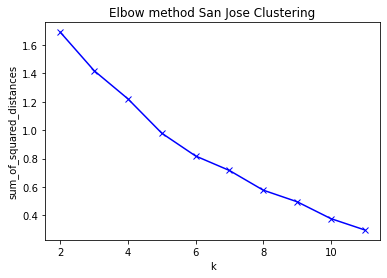

In [32]:

import matplotlib.pyplot as plt

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method San Jose Clustering')
plt.show()


elbow method is difficult to see- seem like 5 Clusters

In [34]:
from sklearn.cluster import KMeans

In [35]:
kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SJ_grouped_clustering)

kmeans.labels_[0:10]

array([1, 1, 3, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### add cluster labels to dataframe

In [36]:
SJ_merged = df

SJtoptenvenues.insert(0, 'Cluster Labels', kmeans.labels_)
SJ_merged = SJ_merged.join(SJtoptenvenues.set_index('Neighborhood'), on= 'Neighborhood')

print(SJ_merged)

       Neighborhood         SJ_address                             query  \
0          Downtown   San Jose, CA, US         Downtown San Jose, CA, US   
1         Japantown   San Jose, CA, US        Japantown San Jose, CA, US   
2      Little Italy   San Jose, CA, US     Little Italy San Jose, CA, US   
3   Little Portugal   San Jose, CA, US  Little Portugal San Jose, CA, US   
4     Little Saigon   San Jose, CA, US    Little Saigon San Jose, CA, US   
5           Mayfair   San Jose, CA, US          Mayfair San Jose, CA, US   
6       Santana Row   San Jose, CA, US      Santana Row San Jose, CA, US   
7     West San Jose   San Jose, CA, US    West San Jose San Jose, CA, US   
8       Willow Glen   San Jose, CA, US      Willow Glen San Jose, CA, US   
9       The Alameda   San Jose, CA, US      The Alameda San Jose, CA, US   
10      Rose Garden   San Jose, CA, US      Rose Garden San Jose, CA, US   
11      Naglee Park   San Jose, CA, US      Naglee Park San Jose, CA, US   
12          

#### change cluster labels type to int 

In [37]:
SJ_merged  = SJ_merged.dropna()
SJ_merged ['Cluster Labels'] =SJ_merged ['Cluster Labels'].astype(int)
SJ_merged.head

<bound method NDFrame.head of        Neighborhood         SJ_address                             query  \
0          Downtown   San Jose, CA, US         Downtown San Jose, CA, US   
1         Japantown   San Jose, CA, US        Japantown San Jose, CA, US   
2      Little Italy   San Jose, CA, US     Little Italy San Jose, CA, US   
3   Little Portugal   San Jose, CA, US  Little Portugal San Jose, CA, US   
4     Little Saigon   San Jose, CA, US    Little Saigon San Jose, CA, US   
5           Mayfair   San Jose, CA, US          Mayfair San Jose, CA, US   
6       Santana Row   San Jose, CA, US      Santana Row San Jose, CA, US   
7     West San Jose   San Jose, CA, US    West San Jose San Jose, CA, US   
8       Willow Glen   San Jose, CA, US      Willow Glen San Jose, CA, US   
9       The Alameda   San Jose, CA, US      The Alameda San Jose, CA, US   
10      Rose Garden   San Jose, CA, US      Rose Garden San Jose, CA, US   
11      Naglee Park   San Jose, CA, US      Naglee Park Sa

####  recreate folium map with labeled clusters San Jose 

In [38]:
SanJose_mapClusters = folium.Map(location=[latitude_SJ, longitude_SJ], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0,1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, long, poi, cluster in zip(SJ_merged['location_lat'],SJ_merged['location_long'], SJ_merged['Neighborhood'], SJ_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, long],
        radius=5,
        popup=label,
        color=rainbow [cluster-1],
        fill=True,
        fill_color=rainbow [cluster-1],
        fill_opacity=1).add_to(SanJose_mapClusters)
       
SanJose_mapClusters

### Cluster 0 Venue type is Cafe RED

In [39]:
print(SJ_merged.loc[SJ_merged['Cluster Labels'] == 0, SJ_merged.columns[[0] + list(range(6, SJ_merged.shape[1]))]])

      Neighborhood  Cluster Labels 1st Most Common Venue  \
13  North San Jose               0                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
13   Hawaiian Restaurant    Light Rail Station           Yoga Studio   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
13     Fish & Chips Shop            Food Stand            Food Court   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
13     Food & Drink Shop                  Food            Flower Shop  


### Cluster 1 Venue type is Resturants, Bar, Cafe, Park, Light rail, Clothing Store, Theater, Intersection PURPLE

In [40]:
print(SJ_merged.loc[SJ_merged['Cluster Labels'] == 1, SJ_merged.columns[[0] + list(range(6, SJ_merged.shape[1]))]])

       Neighborhood  Cluster Labels  1st Most Common Venue  \
0          Downtown               1           Cocktail Bar   
1         Japantown               1    Japanese Restaurant   
2      Little Italy               1            Coffee Shop   
3   Little Portugal               1             Food Stand   
4     Little Saigon               1  Vietnamese Restaurant   
5           Mayfair               1             Playground   
6       Santana Row               1      Accessories Store   
7     West San Jose               1             Food Truck   
10      Rose Garden               1                Theater   
11      Naglee Park               1            Pizza Place   
14        Alum Rock               1           Liquor Store   
15        Evergreen               1           Dessert Shop   
16   Almaden Valley               1            Coffee Shop   
17   South San Jose               1          Grocery Store   

         2nd Most Common Venue 3rd Most Common Venue 4th Most Common 

### Cluster 2 Venue Type is Financial or Legal Service BLUE

In [43]:
print(SJ_merged.loc[SJ_merged['Cluster Labels'] == 2, SJ_merged.columns[[0] + list(range(6, SJ_merged.shape[1]))]])

  Neighborhood  Cluster Labels       1st Most Common Venue  \
9  The Alameda               2  Financial or Legal Service   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
9                 Hotel          Intersection        Breakfast Spot   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
9                Lawyer           Flea Market            Food Truck   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
9            Food Stand            Food Court      Food & Drink Shop  


### Cluster 3 Venue type is Park

In [44]:
print(SJ_merged.loc[SJ_merged['Cluster Labels'] == 3, SJ_merged.columns[[0] + list(range(6, SJ_merged.shape[1]))]])

   Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
12       Alviso               3                  Park       Thai Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
12            Smoke Shop        Cosmetics Shop     Convenience Store   

   6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
12    Italian Restaurant  Eastern European Restaurant    Chinese Restaurant   

   9th Most Common Venue 10th Most Common Venue  
12  Fast Food Restaurant                    Bar  


### Cluster 4 Venue type is Cocktail Bar - ORANGE

In [46]:
print(SJ_merged.loc[SJ_merged['Cluster Labels'] == 4, SJ_merged.columns[[0] + list(range(6, SJ_merged.shape[1]))]])

  Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
8  Willow Glen               4          Cocktail Bar           Art Gallery   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
8                  Park           Yoga Studio            Food Stand   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
8            Food Court     Food & Drink Shop                  Food   

  9th Most Common Venue 10th Most Common Venue  
8           Flower Shop            Flea Market  


#### run Foursquare for Austin 

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_ATX = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_ATX.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_ATX)


In [48]:
ATX_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['location_lat'],
                                   longitudes=df2['location_long']
                                  )

Allandale
Barton Hills
Buda
Cedar Park
Cherrywood
Downtown
Dripping Springs
East Austin
Georgetown
 Hyde Park
 Kyle
 Mueller
 North Loop
 North University
 Old West Austin
 South Austin
 Tarrytown
 Wells Branch
 Westlake


In [50]:
print(ATX_venues.shape)
print(ATX_venues)

(319, 7)
          Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Barton Hills              30.251571              -97.784106   
1         Barton Hills              30.251571              -97.784106   
2                 Buda              30.090328              -97.814502   
3                 Buda              30.090328              -97.814502   
4                 Buda              30.090328              -97.814502   
5                 Buda              30.090328              -97.814502   
6                 Buda              30.090328              -97.814502   
7                 Buda              30.090328              -97.814502   
8                 Buda              30.090328              -97.814502   
9           Cedar Park              30.520500              -97.836826   
10          Cedar Park              30.520500              -97.836826   
11          Cedar Park              30.520500              -97.836826   
12          Cedar Park              30.520

#### One hot encoding for Austin Texas Neighborhoods

In [51]:
# one hot encoding
ATX_onehot = pd.get_dummies(ATX_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ATX_onehot['Neighborhood'] = ATX_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ATX_onehot.columns[-1]] + list(ATX_onehot.columns[:-1])
ATX = ATX_onehot[fixed_columns]

ATX_onehot.head

<bound method NDFrame.head of      Accessories Store  Adult Boutique  Airport Terminal  American Restaurant  \
0                    0               0                 0                    0   
1                    0               0                 0                    0   
2                    0               0                 0                    0   
3                    0               0                 0                    0   
4                    0               0                 0                    0   
5                    0               0                 0                    0   
6                    0               0                 0                    0   
7                    0               0                 0                    0   
8                    0               0                 0                    0   
9                    0               0                 0                    0   
10                   0               0                 0                    0  

#### group the neighborhoods

In [52]:
ATX_grouped = ATX_onehot.groupby('Neighborhood').mean().reset_index()
print(ATX_grouped)
print(ATX_grouped.shape)

         Neighborhood  Accessories Store  Adult Boutique  Airport Terminal  \
0           Hyde Park               0.00        0.000000               0.0   
1                Kyle               0.00        0.000000               0.0   
2             Mueller               0.00        0.000000               0.0   
3          North Loop               0.00        0.035714               0.0   
4    North University               0.00        0.000000               0.0   
5     Old West Austin               0.00        0.000000               0.0   
6        South Austin               0.00        0.000000               0.5   
7           Tarrytown               0.00        0.000000               0.0   
8        Wells Branch               0.00        0.000000               0.0   
9            Westlake               0.00        0.000000               0.0   
10       Barton Hills               0.00        0.000000               0.0   
11               Buda               0.00        0.000000        

#### Show top 10 

In [53]:
num_top_venues = 10

for hood in ATX_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ATX_grouped[ATX_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Hyde Park----
                           venue  freq
0                    Bus Station  0.11
1             Italian Restaurant  0.11
2                    Cheese Shop  0.11
3                           Park  0.06
4             Mexican Restaurant  0.06
5  Vegetarian / Vegan Restaurant  0.06
6                Bed & Breakfast  0.06
7                         Bakery  0.06
8                  Grocery Store  0.06
9                     Lighthouse  0.06


---- Kyle----
                     venue  freq
0       Mexican Restaurant  0.29
1     Fast Food Restaurant  0.29
2              Gas Station  0.14
3        Food & Drink Shop  0.14
4            Grocery Store  0.14
5              Music Venue  0.00
6  New American Restaurant  0.00
7                Nightclub  0.00
8                   Office  0.00
9        Accessories Store  0.00


---- Mueller----
                  venue  freq
0    Italian Restaurant   0.1
1              Beer Bar   0.1
2        Science Museum   0.1
3          Cocktail Bar   0.1
4   

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ATXtoptenvenues = pd.DataFrame(columns=columns)
ATXtoptenvenues['Neighborhood'] = ATX_grouped['Neighborhood']

for ind in np.arange(SJ_grouped.shape[0]):
    ATXtoptenvenues.iloc[ind, 1:] = return_most_common_venues(SJ_grouped.iloc[ind, :], num_top_venues)

print(ATXtoptenvenues)

         Neighborhood       1st Most Common Venue       2nd Most Common Venue  \
0           Hyde Park                 Coffee Shop                        Bank   
1                Kyle                Liquor Store          Light Rail Station   
2             Mueller                        Park             Thai Restaurant   
3          North Loop                Cocktail Bar          Mexican Restaurant   
4    North University                Dessert Shop          Italian Restaurant   
5     Old West Austin         Japanese Restaurant            Sushi Restaurant   
6        South Austin                 Coffee Shop          Mexican Restaurant   
7           Tarrytown                  Food Stand       Portuguese Restaurant   
8        Wells Branch       Vietnamese Restaurant                        Café   
9            Westlake                  Playground  Construction & Landscaping   
10       Barton Hills                 Pizza Place       College Arts Building   
11               Buda       

#### determine optimal number of Clusters for Austin

In [56]:
sum_of_squared_distances = []
K=range(2,10)
ATX_grouped_clustering = ATX_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(ATX_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

23456789

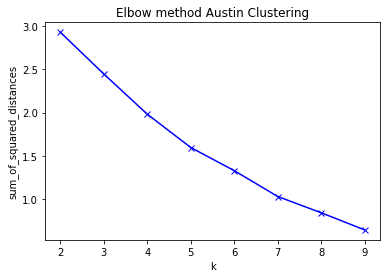

In [57]:
import matplotlib.pyplot as plt

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method Austin Clustering')
plt.show()

#### elbow method for Austin texas looks like 4

In [58]:
kclusters = 4

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ATX_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 3, 2, 0], dtype=int32)

#### add cluster labels to Austin 

In [59]:
ATX_merged = df2

ATXtoptenvenues.insert(0, 'Cluster Labels', kmeans.labels_)
ATX_merged = ATX_merged.join(ATXtoptenvenues.set_index('Neighborhood'), on= 'Neighborhood')

print(ATX_merged)

         Neighborhood      ATX_address                             query  \
0           Allandale   Austin, TX, US          Allandale Austin, TX, US   
1        Barton Hills   Austin, TX, US       Barton Hills Austin, TX, US   
2                Buda   Austin, TX, US               Buda Austin, TX, US   
3          Cedar Park   Austin, TX, US         Cedar Park Austin, TX, US   
4          Cherrywood   Austin, TX, US         Cherrywood Austin, TX, US   
5            Downtown   Austin, TX, US           Downtown Austin, TX, US   
6    Dripping Springs   Austin, TX, US   Dripping Springs Austin, TX, US   
7         East Austin   Austin, TX, US        East Austin Austin, TX, US   
8          Georgetown   Austin, TX, US         Georgetown Austin, TX, US   
9           Hyde Park   Austin, TX, US          Hyde Park Austin, TX, US   
10               Kyle   Austin, TX, US               Kyle Austin, TX, US   
11            Mueller   Austin, TX, US            Mueller Austin, TX, US   
12         N

#### change cluster labels type to int

In [60]:
ATX_merged  = ATX_merged.dropna()
ATX_merged ['Cluster Labels'] =ATX_merged ['Cluster Labels'].astype(int)
ATX_merged.head

<bound method NDFrame.head of          Neighborhood      ATX_address                             query  \
1        Barton Hills   Austin, TX, US       Barton Hills Austin, TX, US   
2                Buda   Austin, TX, US               Buda Austin, TX, US   
3          Cedar Park   Austin, TX, US         Cedar Park Austin, TX, US   
4          Cherrywood   Austin, TX, US         Cherrywood Austin, TX, US   
5            Downtown   Austin, TX, US           Downtown Austin, TX, US   
6    Dripping Springs   Austin, TX, US   Dripping Springs Austin, TX, US   
7         East Austin   Austin, TX, US        East Austin Austin, TX, US   
8          Georgetown   Austin, TX, US         Georgetown Austin, TX, US   
9           Hyde Park   Austin, TX, US          Hyde Park Austin, TX, US   
10               Kyle   Austin, TX, US               Kyle Austin, TX, US   
11            Mueller   Austin, TX, US            Mueller Austin, TX, US   
12         North Loop   Austin, TX, US         North Loop 

#### recreate folium map for Austin with labeled clusters

In [61]:
Austin_mapClusters = folium.Map(location=[latitude_ATX, longitude_ATX], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0,1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, long, poi, cluster in zip(ATX_merged['location_lat'],ATX_merged['location_long'], ATX_merged['Neighborhood'], ATX_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, long],
        radius=5,
        popup=label,
        color=rainbow [cluster-1],
        fill=True,
        fill_color=rainbow [cluster-1],
        fill_opacity=0.9).add_to(Austin_mapClusters)
       
Austin_mapClusters

### Cluster 0 Venue type is Resturants, Cafe, Bars, Food Vendors, Park, Playground, Grocery Store, Theater, Playground  store RED

In [62]:
print(ATX_merged.loc[ATX_merged['Cluster Labels'] == 0, ATX_merged.columns[[0] + list(range(6, ATX_merged.shape[1]))]])

         Neighborhood  Cluster Labels 1st Most Common Venue  \
2                Buda               0                  Café   
3          Cedar Park               0               Theater   
4          Cherrywood               0     Accessories Store   
5            Downtown               0         Grocery Store   
7         East Austin               0            Food Truck   
8          Georgetown               0          Cocktail Bar   
9           Hyde Park               0           Coffee Shop   
10               Kyle               0          Liquor Store   
11            Mueller               0                  Park   
12         North Loop               0          Cocktail Bar   
13   North University               0          Dessert Shop   
14    Old West Austin               0   Japanese Restaurant   
15       South Austin               0           Coffee Shop   
18           Westlake               0            Playground   

         2nd Most Common Venue 3rd Most Common Venue 4

### Cluster 1 Venue type is Pizza PURPLE

In [63]:
print(ATX_merged.loc[ATX_merged['Cluster Labels'] == 1, ATX_merged.columns[[2] + list(range(6, ATX_merged.shape[1]))]])

                         query  Cluster Labels 1st Most Common Venue  \
1  Barton Hills Austin, TX, US               1           Pizza Place   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1  College Arts Building            Bagel Shop          Burger Joint   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
1       Bubble Tea Shop        Sandwich Place  South Indian Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1                  Café     Convenience Store         Farmers Market  


### Cluster 2 Venue type is Vietnamese Restaurant TEAL

In [64]:
print(ATX_merged.loc[ATX_merged['Cluster Labels'] == 2, ATX_merged.columns[[3] + list(range(6, ATX_merged.shape[1]))]])

   location_lat  Cluster Labels  1st Most Common Venue 2nd Most Common Venue  \
17      30.4009               2  Vietnamese Restaurant                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
17          Dessert Shop        Sandwich Place    Chinese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
17     Food & Drink Shop      Asian Restaurant  Fast Food Restaurant   

        9th Most Common Venue 10th Most Common Venue  
17  Cajun / Creole Restaurant     Salon / Barbershop  


### Cluster 3 Venue type is Financial or Legal Service, Food Stand  intersection Yellow

In [65]:
print(ATX_merged.loc[ATX_merged['Cluster Labels'] == 3, ATX_merged.columns[[3] + list(range(6, ATX_merged.shape[1]))]])

   location_lat  Cluster Labels       1st Most Common Venue  \
6       30.2028               3  Financial or Legal Service   
16      30.3031               3                  Food Stand   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6                   Hotel          Intersection        Breakfast Spot   
16  Portuguese Restaurant           Gas Station     Convenience Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                 Lawyer           Flea Market            Food Truck   
16          Concert Hall                Bakery    Mexican Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6             Food Stand            Food Court      Food & Drink Shop  
16        Clothing Store           Flea Market             Food Court  


### 6. Final Comparison

In [66]:
SJ_merged.head

<bound method NDFrame.head of        Neighborhood         SJ_address                             query  \
0          Downtown   San Jose, CA, US         Downtown San Jose, CA, US   
1         Japantown   San Jose, CA, US        Japantown San Jose, CA, US   
2      Little Italy   San Jose, CA, US     Little Italy San Jose, CA, US   
3   Little Portugal   San Jose, CA, US  Little Portugal San Jose, CA, US   
4     Little Saigon   San Jose, CA, US    Little Saigon San Jose, CA, US   
5           Mayfair   San Jose, CA, US          Mayfair San Jose, CA, US   
6       Santana Row   San Jose, CA, US      Santana Row San Jose, CA, US   
7     West San Jose   San Jose, CA, US    West San Jose San Jose, CA, US   
8       Willow Glen   San Jose, CA, US      Willow Glen San Jose, CA, US   
9       The Alameda   San Jose, CA, US      The Alameda San Jose, CA, US   
10      Rose Garden   San Jose, CA, US      Rose Garden San Jose, CA, US   
11      Naglee Park   San Jose, CA, US      Naglee Park Sa

In [67]:
SJ_top5=SJ_merged[['Cluster Labels','1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']]
print(SJ_top5)

    Cluster Labels       1st Most Common Venue       2nd Most Common Venue  \
0                1                Cocktail Bar          Mexican Restaurant   
1                1         Japanese Restaurant            Sushi Restaurant   
2                1                 Coffee Shop          Mexican Restaurant   
3                1                  Food Stand       Portuguese Restaurant   
4                1       Vietnamese Restaurant                        Café   
5                1                  Playground  Construction & Landscaping   
6                1           Accessories Store      Furniture / Home Store   
7                1                  Food Truck                 Summer Camp   
8                4                Cocktail Bar                 Art Gallery   
9                2  Financial or Legal Service                       Hotel   
10               1                     Theater     New American Restaurant   
11               1                 Pizza Place       College Art

### San Jose Top Cluster Label 1 - Most Common Venue  Coffee Shop 2x, Food related  6x (Japanese, Vietnamese,Food Stand, Food Truck, Pizza, Dessert), Entertainment 2x (Theater, Playground)

In [68]:
ATX_merged.head

<bound method NDFrame.head of          Neighborhood      ATX_address                             query  \
1        Barton Hills   Austin, TX, US       Barton Hills Austin, TX, US   
2                Buda   Austin, TX, US               Buda Austin, TX, US   
3          Cedar Park   Austin, TX, US         Cedar Park Austin, TX, US   
4          Cherrywood   Austin, TX, US         Cherrywood Austin, TX, US   
5            Downtown   Austin, TX, US           Downtown Austin, TX, US   
6    Dripping Springs   Austin, TX, US   Dripping Springs Austin, TX, US   
7         East Austin   Austin, TX, US        East Austin Austin, TX, US   
8          Georgetown   Austin, TX, US         Georgetown Austin, TX, US   
9           Hyde Park   Austin, TX, US          Hyde Park Austin, TX, US   
10               Kyle   Austin, TX, US               Kyle Austin, TX, US   
11            Mueller   Austin, TX, US            Mueller Austin, TX, US   
12         North Loop   Austin, TX, US         North Loop 

In [69]:
ATX_top5=ATX_merged[['Cluster Labels','1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']]
print(ATX_top5)

    Cluster Labels       1st Most Common Venue       2nd Most Common Venue  \
1                1                 Pizza Place       College Arts Building   
2                0                        Café         Hawaiian Restaurant   
3                0                     Theater     New American Restaurant   
4                0           Accessories Store      Furniture / Home Store   
5                0               Grocery Store                 Pizza Place   
6                3  Financial or Legal Service                       Hotel   
7                0                  Food Truck                 Summer Camp   
8                0                Cocktail Bar                 Art Gallery   
9                0                 Coffee Shop                        Bank   
10               0                Liquor Store          Light Rail Station   
11               0                        Park             Thai Restaurant   
12               0                Cocktail Bar          Mexican 

### Austin Top Cluster Label 0 - Most Common Venue  Coffee Shop 2x, Cocktail bar 2x, Food related  5x (Pizza, Cafe, Food Truck, Dessert,  Japanese ), Entertainment 3x (Theater, Park, Playground)